<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [80]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [81]:
#!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv





































































### Load Data From CSV File  

In [82]:
df = pd.read_csv('loan_train.csv')
df.head(100)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
95,116,116,PAIDOFF,1000,30,9/11/2016,10/10/2016,40,college,male
96,117,117,PAIDOFF,1000,30,9/11/2016,10/10/2016,23,High School or Below,male
97,118,118,PAIDOFF,1000,30,9/11/2016,10/10/2016,35,Bechalor,male
98,119,119,PAIDOFF,800,15,9/11/2016,9/25/2016,24,college,male


In [83]:
df.shape




(346, 10)

### Convert to date time object 

In [84]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [85]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [86]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



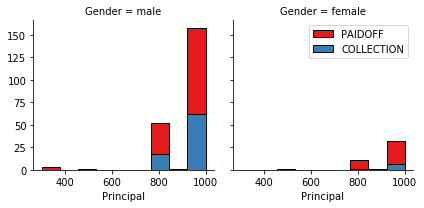

In [87]:



import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

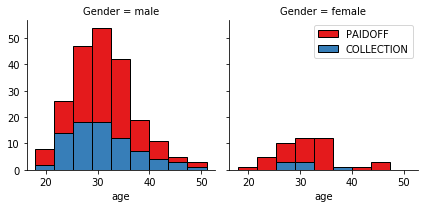

In [88]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()






# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

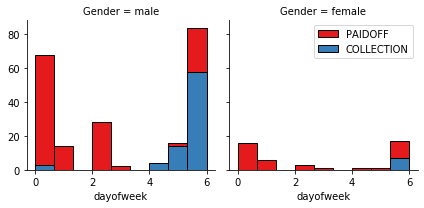

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


In [89]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()
df.head()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [90]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [91]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#df.head()

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [92]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [93]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [94]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [95]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1




### Feature selection

Lets defind feature sets, X:

In [96]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [97]:
y = df['loan_status'].values
y[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [98]:
y = df['loan_status'].apply(lambda loan_status: 0 if loan_status == 'PAIDOFF' else 1).values

y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [99]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

### Train-Test Split

In [100]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=5 )
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


#### Import library 

In [101]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=5 for now:

In [102]:
k = 5
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting
we can use the model to predict the test set:

In [103]:
pred_knn = knn.predict(X_testset)
pred_knn[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

****### Accuracy evaluation

In [104]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, knn.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, pred_knn))

Train set Accuracy:  0.8333333333333334
Test set Accuracy:  0.7


### Finding The Best K

In [105]:
Ks = 10
mean_ac = np.zeros((Ks-1))
std_ac = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    pred_knn=knn.predict(X_testset)
    mean_ac[n-1] = metrics.accuracy_score(y_testset,pred_knn )
    
    std_ac[n-1]=np.std(pred_knn==y_testset)/np.sqrt(pred_knn.shape[0])
    
mean_ac

array([0.65714286, 0.67142857, 0.7       , 0.7       , 0.7       ,
       0.72857143, 0.68571429, 0.68571429, 0.68571429])

* #### Plot  model accuracy  for Different number of Neighbors 

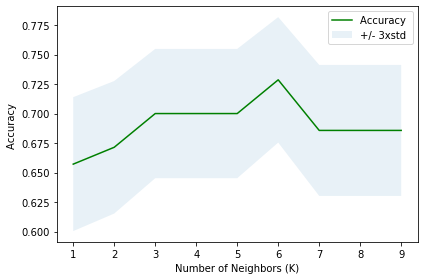

In [106]:
plt.plot(range(1,Ks),mean_ac,'g')
plt.fill_between(range(1,Ks),mean_ac - 1 * std_ac,mean_ac + 1 * std_ac, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [107]:
print( "The best accuracy was with", mean_ac.max(), "with k=", mean_ac.argmax()+1) 

The best accuracy was with 0.7285714285714285 with k= 6


In [108]:
best_knn= KNeighborsClassifier(n_neighbors =mean_ac.argmax()+1).fit(X_trainset,y_trainset)
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [109]:
#print("F1-SCORE:: ",f1_score( y_testset, pred_knn, average='weighted'))


# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

modeling

In [111]:
loanTree = DecisionTreeClassifier(criterion="entropy")
#loanTree.fit(X_trainset,y_trainset)
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

predicting


In [112]:
predictedTree = loanTree.predict(X_testset)

view data in y_test and predictedTree

In [113]:
print(y_testset[0:5])
print(predictedTree[0:5])

[0 1 0 1 0]
[1 0 0 0 0]


EVALUATION

now check accuracy of our model

In [114]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy of DecisionTrees : ", metrics.accuracy_score(y_testset, predictedTree))

Accuracy of DecisionTrees :  0.6571428571428571


> jackard index

In [115]:
from sklearn.metrics import jaccard_similarity_score
print("jaccard index is:",jaccard_similarity_score( y_testset, predictedTree))

jaccard index is: 0.6571428571428571


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [116]:
from sklearn.metrics import f1_score
print("F1 score is:",f1_score( y_testset, predictedTree, average='weighted'))

F1 score is: 0.6458204334365326


F1 score

visualisation of our model

In [117]:
#!conda install -c http://conda.anaconda.org/anaconda pydotplus 
#!conda install -c conda-forge python-graphviz -y

# Support Vector Machine

modelling and predicting
and finding accuracy with all kernel function like linear,rbf,sigmoid 

In [164]:


from sklearn import svm

knls = ['linear', 'rbf', 'sigmoid']
mean_accuracyp = np.zeros((len(knls)))
for kernel in knls:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_trainset, y_trainset)
    svm_predict = clf.predict(X_testset)
    mean_accuracyp[knls.index(kernel)] = metrics.accuracy_score(y_testset, svm_predict)
mean_accuracyp
print( "The best accuracy was :: ", mean_accuracyp.max())

The best accuracy was ::  0.7


jaccard index for RBF kernel function

In [165]:
jaccard_index=[]
F1_score=[]
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 
svm_pred = clf.predict(X_testset)
svm_pred [0:5]
print(jaccard_similarity_score(y_testset, svm_pred))
print(f1_score(y_testset, svm_pred, average='weighted')) 


0.7
0.5764705882352941


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


jaccard index for SIGMOID kernel function

In [166]:
"""
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_trainset, y_trainset) 
svm_pred = clf.predict(X_testset)
svm_pred [0:5]
print(jaccard_similarity_score(y_testset, svm_pred))
print(f1_score(y_testset, svm_pred, average='weighted') )
"""

"\nclf = svm.SVC(kernel='sigmoid')\nclf.fit(X_trainset, y_trainset) \nsvm_pred = clf.predict(X_testset)\nsvm_pred [0:5]\nprint(jaccard_similarity_score(y_testset, svm_pred))\nprint(f1_score(y_testset, svm_pred, average='weighted') )\n"

jaccard index for LINEAR kernel function

In [167]:
"""
clf = svm.SVC(kernel='linear')
clf.fit(X_trainset, y_trainset) 
svm_pred = clf.predict(X_testset)
svm_pred [0:5]
print(jaccard_similarity_score(y_testset, svm_pred))
print(f1_score(y_testset, svm_pred, average='weighted') )
"""


"\nclf = svm.SVC(kernel='linear')\nclf.fit(X_trainset, y_trainset) \nsvm_pred = clf.predict(X_testset)\nsvm_pred [0:5]\nprint(jaccard_similarity_score(y_testset, svm_pred))\nprint(f1_score(y_testset, svm_pred, average='weighted') )\n"

view data in y_testset and 

Evaluation

# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_trainset,y_trainset)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
LR_pred = LR.predict(X_testset)
LR_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [125]:
LR_pred_praba = LR.predict_proba(X_testset)
LR_pred_praba

array([[0.5033089 , 0.4966911 ],
       [0.52698941, 0.47301059],
       [0.50901853, 0.49098147],
       [0.50140542, 0.49859458],
       [0.52561108, 0.47438892],
       [0.56292408, 0.43707592],
       [0.55245726, 0.44754274],
       [0.50235716, 0.49764284],
       [0.75331747, 0.24668253],
       [0.51282374, 0.48717626],
       [0.54688956, 0.45311044],
       [0.51024995, 0.48975005],
       [0.68628216, 0.31371784],
       [0.72808637, 0.27191363],
       [0.70587727, 0.29412273],
       [0.57441864, 0.42558136],
       [0.67561931, 0.32438069],
       [0.53376561, 0.46623439],
       [0.68955144, 0.31044856],
       [0.50521228, 0.49478772],
       [0.69026835, 0.30973165],
       [0.57194925, 0.42805075],
       [0.70385949, 0.29614051],
       [0.70226994, 0.29773006],
       [0.57507527, 0.42492473],
       [0.55433907, 0.44566093],
       [0.56666717, 0.43333283],
       [0.68873588, 0.31126412],
       [0.54322651, 0.45677349],
       [0.52371219, 0.47628781],
       [0.

jaccard index

In [126]:
print(jaccard_similarity_score(y_testset, LR_pred))

0.7


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


F1 score

In [127]:
print(f1_score(y_testset,LR_pred, average='weighted') )

0.6004459308807136


log loss

In [128]:
from sklearn.metrics import log_loss
log_loss(y_testset, LR_pred_praba)

0.5858479985828119

# Model Evaluation using Test set

In [129]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [130]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [131]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Convert to date time object

In [132]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [133]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [134]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [135]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [136]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


normalize the data

In [137]:
test_X = preprocessing.StandardScaler().fit(Feature_test).transform(Feature_test)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

keeping aiming value separate

In [138]:
test_y = test_df['loan_status'].apply(lambda loan_status: 0 if loan_status == 'PAIDOFF' else 1).values

test_y[0:50]
 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [139]:
test_X[0:10]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-1.24479571, -0.78854628,  0.19650211, -0.50578054,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588, -0.78854628, -1.31937134, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [ 0.49362588,  0.92844966,  0.02807173, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-0.66532184, -0.78854628

In [153]:
finalknn_pred=best_knn.predict(test_X)
JC_knn=jaccard_similarity_score(test_y, finalknn_pred)
FS_knn=f1_score(test_y, finalknn_pred, average='weighted')

print("jaccard score for KNN: ",JC_knn )
print("f1 score for KNN: ",FS_knn )


jaccard score for KNN:  0.7222222222222222
f1 score for KNN:  0.6704776923582364


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [154]:
finaltree_pred=loanTree.predict(test_X)
JC_tree=jaccard_similarity_score(test_y, finaltree_pred)
FS_tree=f1_score(test_y, finaltree_pred, average='weighted')

print("jaccard score for TREE: ",JC_tree )
print("f1 score for TREE: ",FS_tree )

jaccard score for TREE:  0.7222222222222222
f1 score for TREE:  0.7001989201477693


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [168]:
finalsvm_pred=clf.predict(test_X)
JC_svm=jaccard_similarity_score(test_y, finalsvm_pred)
FS_svm=f1_score(test_y, finalsvm_pred, average='weighted')

print("jaccard score for SVM: ",JC_svm )
print("f1 score for SVM: ",FS_svm )

jaccard score for SVM:  0.7407407407407407
f1 score for SVM:  0.6304176516942475


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [173]:
finalLR_pred=LR.predict(test_X)
JC_LR=jaccard_similarity_score(test_y, finalLR_pred)
FS_LR=f1_score(test_y, finalLR_pred, average='weighted')
LOGLOSS_LR = log_loss(test_y,LR.predict_proba(test_X))
print("jaccard score for LR: ",JC_LR )
print("f1 score for LR: ",FS_LR )
print("log loss score for LR: ",LOGLOSS_LR )

jaccard score for LR:  0.7592592592592593
f1 score for LR:  0.6717642373556352
log loss score for LR:  0.565017831496447


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [174]:
#list for jeccard score
list_jc = [JC_knn, JC_tree, JC_svm, JC_LR]
#list for f1 score
list_fs = [FS_knn, FS_tree, FS_svm, FS_LR]
#list for log loss
list_ll=  ['NA','NA','NA', LOGLOSS_LR]

In [175]:
result= pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
result.columns = ['Jaccard']
result.insert(loc=1, column='F1-score', value=list_fs)
result.insert(loc=2, column='LogLoss', value=list_ll)
result.columns.name = 'Algorithm'
result

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.722222,0.670478,NA
Decision Tree,0.722222,0.700199,NA
SVM,0.740741,0.630418,NA
Logistic Regression,0.759259,0.671764,0.565018


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>